# Bootstrapping the Coin Toss

In this notebook, you will simulate a fair coin toss using a Bernoulli distribution and then use <a href="https://en.wikipedia.org/wiki/Bootstrapping_(statistics)">bootstrapping</a> to quantify the fairness of the coin and its uncertainty.

## Imports

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## Bootstrapping the fair coin toss

In [2]:
n = 500

Use `numpy.random.choice` to simulate `n` tosses of a fair coin that has values of `H` and `T` with equal probabilities. Save the data in a NumPy array named `data`.

In [3]:
# YOUR CODE HERE
C = np.random.choice(['H','T'], n)

Make an appropriately labeled `countplot` using Seaborn to visualize the coin tosses:

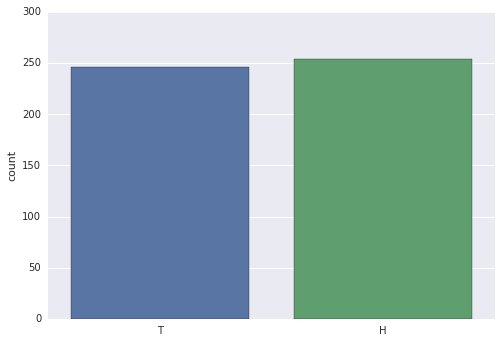

In [4]:
# YOUR CODE HERE
sns.countplot(x=C)

Write a function, `fair`, that computes the ratio of the number of `H` values to the total number of values.

In [5]:
def fair(data):
    """Compute the fraction of the tosses that have a value of `H`."""
    heads = 0
    for d in data:
        if d == 'H':
            heads += 1
    return heads/len(data)

In [6]:
assert fair(np.array(['H','H','T','T']))==0.5
assert fair(np.array(['T','T','T','T']))==0.0
assert fair(np.array(['H','H','H','T']))==0.75
assert fair(np.array(['H','H','H','H']))==1.0

Write a function, `bootstrap_data` that can bootstrap resample a 1d NumPy array a single time. The return value should be an array with the same shape as the input, with random samples drawn from the input array with replacement.

In [7]:
def bootstrap_data(data):
    """Perform a single boostrap resampling of the input data array."""
    return np.random.choice(data, len(data))

In [8]:
test_data = np.random.randint(10, size=10)
test_data_re = bootstrap_data(test_data)
assert test_data.shape==test_data_re.shape
for element in test_data_re:
    assert element in test_data

Write a function, `bootstrap_function`, that can apply a function to `n` bootstrapped versions of an input array:

In [44]:
def bootstrap_function(data, f, n):
    """Compute a function on data bootstrapped n times.
    
    Parameters
    ----------
    data: ndarray
        The input data to be resampled.
    f: function(data)
        The function to be applied to the boostrapped data. The function should take a single
        argument (the data) and return a float.
    n: int
        The number of times to resample the data
        
    Returns
    -------
    result: ndarray
        An n element array of the values of the function applied to the resampled data.
    """
    # YOUR CODE HERE
    for m in range(n):
        data = np.array(list(map(f, data)))
#         bootstrap_data(np.array(list(map(f, data))))
    return data

In [45]:
test_data = np.array([0,0,0,0,0,1,1,1,1,1])
fb = bootstrap_function(test_data, lambda data: 1.0, 10)

print(fb)

assert np.allclose(fb, np.array(10*[1.0]))
fb = bootstrap_function(test_data, lambda data: data.mean(), 10)
assert fb.mean()<1.0 and fb.mean()>0.0

[0 0 0 0 0 1 1 1 1 1]


AssertionError: 

Now use `bootstrap_function` to apply the `fair` function to `200` bootstrapped versions of the original data above to compute the bootstrapped distribution of coin fairness.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Visualize the bootstrapped fairness distribution using an appropriately labeled Seaborn `distplot`. Make sure your x-limit spans $[0,1]$. The distribution should be peaked near 0.5 (fair coin), but have a finite variance indicating the uncertainty in the fairness.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Compute the mean and 95% confidence interval for the fairness using `np.percentile`:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()